In [1]:
#20127662 - Nguyen Dinh Van
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imgArr ():
    nameFile = input("Input name of image: ")
    img = Image.open(nameFile)
    img = np.asarray(img)
    return img

In [3]:
def saveImage (img, fileName):
    plt.imsave(fileName, np.array(img, dtype='uint8'))

In [4]:
def brightness(img, dosang):
    rowImg = img.shape[0]
    columnImg = img.shape[1]
    channelImg = img.shape[2]
    img = img.reshape(rowImg * columnImg, channelImg)
    # Tang gia tri cua tung Pixel
    newImg = dosang + np.zeros((rowImg * columnImg, 3)) + img
    # Dk gia tri sau khi nang phai nam trong khoang 0 -> 255)
    newImg = np.clip(newImg, 0, 255)

    return newImg.reshape(rowImg, columnImg, channelImg)

In [5]:
def contrast(img, dotuongphan):

    rowImg = img.shape[0]
    columnImg = img.shape[1]
    channelImg = img.shape[2]
    img = img.reshape(rowImg * columnImg, channelImg)
    # Gia tri kiem soat do tuong phan (1 ~ Anh goc)
    factor = (259 * (dotuongphan + 255)) / (255 * (259 - dotuongphan))

    numberArray = 128 + np.zeros((rowImg * columnImg, 3))
    newImg = factor * (img - (numberArray)) + 128
    # Dk gia tri sau khi nang phai nam trong khoang 0 -> 255)
    newImg = np.clip(newImg, 0, 255)

    return newImg.reshape(rowImg, columnImg, channelImg)

In [6]:
def flip (img, type):
    if type == 'horizontal':
        newImg = np.fliplr(img)
    if type == 'vertical':
        newImg = np.flipud(img)
    return newImg

In [7]:
def grayscale (img):

    rowImg = img.shape[0]
    columnImg = img.shape[1]
    channelImg = img.shape[2]
    img = img.reshape(rowImg * columnImg, channelImg)
    # Tinh gia trinh trung binh
    temp = ((img[:, 0] + img[:, 1] + img[:, 2]) / 3).reshape(rowImg * columnImg, 1)
    newImg = temp
    newImg = np.concatenate((newImg,temp), axis= 1)
    newImg = np.concatenate((newImg,temp),axis = 1)
    
    return newImg.reshape(rowImg, columnImg, channelImg)

In [8]:
def blur (img):
    
    rowImg = img.shape[0]
    columnImg = img.shape[1]

    newImg = img.copy()
    for x in range(rowImg):
        if x < 1 or x + 1 == rowImg or x % 3 != 0:
            continue
        for y in range(columnImg):
            if y < 1 or y + 1 == columnImg or y % 3 != 0:
                continue
            sum = 0
            for i in [[-1, 1], [0, 1], [1, 1], [-1, 0], [0, 0], [1, 0], [-1, -1], [0, -1], [1, -1]]:
                sum += img[x + i[0], y + i[1]]
            newImg[x][y] = np.clip(sum, 0, 255) 

    return newImg

In [9]:
def concatenate(img1, img2):
    img1 = grayscale(img1)
    img2 = grayscale(img2)
    newImg = img1 + img2
    return newImg

In [10]:
def roundFrame (img):
    rowImg = img.shape[0]
    columnImg = img.shape[1]

    # (x - a)^2 + (y - b)^2 = R^2
    O = [rowImg // 2, columnImg // 2]
    if rowImg <= columnImg:
        R = (O[0] - rowImg)**2 + (O[1] - columnImg // 2)**2
    else:
        R = (O[0] - rowImg // 2)**2 + (O[1] - columnImg)**2
    newImg = img.copy()
    for x in range(rowImg):
        for y in range(columnImg):
            # Neu pixle nam ngoai duong tron gan bang 0
            if (x - O[0])** 2 + (y - O[1])** 2 > R:
                newImg[x][y] = [0, 0, 0]

    return newImg

In [11]:
def elipFrame (img):
    rowImg = img.shape[0]
    columnImg = img.shape[1]

    # (x / a)^2 + (y / b)^2 = 1
    O = [rowImg // 2, columnImg // 2]
    A = (2/8)**2 * ((O[0])**2 + (O[1])**2)
    B = (5/8)**2 * ((O[0])**2 + (O[1])**2)
    # Ma tran nhan biet cac diem nam trong elip
    check = np.zeros((rowImg, columnImg))

    newImg = img.copy()
    for x in range(rowImg):
        for y in range(columnImg):
            # Cac pixel nam trong elip duoc quay goc 45'
            if not(((x - rowImg // 2)**2 / A) + ((y - columnImg // 2)**2 / B) > 1):
                x_ = int((x - O[0]) * 0.7071067812 - (y - O[1]) * 0.7071067812) + O[0]
                y_ = int((x - O[0]) * 0.7071067812 + (y - O[1]) * 0.7071067812) + O[1]
                x_ = np.clip(x_,0, rowImg - 1)
                y_ = np.clip(y_, 0, columnImg - 1)
                check[x_][y_] = 1
            # Cac pixel nam trong elip duoc quay goc 45'
            if not(((x - rowImg // 2)**2 / A) + ((y - columnImg // 2)**2 / B) > 1):
                x_ = int((x - O[0]) * 0.7071067812 - (y - O[1]) * -0.7071067812) + O[0]
                y_ = int((x - O[0]) * -0.7071067812 + (y - O[1]) * 0.7071067812) + O[1]
                x_ = np.clip(x_,0, rowImg - 1)
                y_ = np.clip(y_, 0, columnImg - 1)
                check[x_][y_] = 1
    # Pixel nam ngoai elip
    for x in range(rowImg):
        for y in range(columnImg):
            if check[x][y] == 0:
                newImg[x][y] = [0, 0, 0]

    return newImg

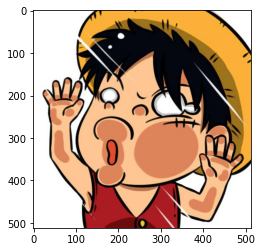

0. All
1. Brightness
2. Contrast
3. Flip
4. Grayscale
5. Blur
6. Concatenate
7. Round Frame
8. Elip Frame


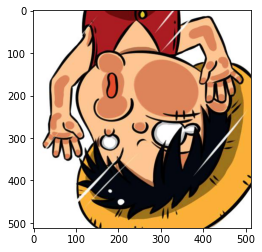

In [12]:
if __name__ == '__main__':
    img = imgArr()
    plt.imshow(img.astype(np.uint8))
    plt.show()
    Do_sang = 20
    Do_tuong_phan = 20

    print("0. All")
    print("1. Brightness")
    print("2. Contrast")
    print("3. Flip")
    print("4. Grayscale")
    print("5. Blur")
    print("6. Concatenate")
    print("7. Round Frame")
    print("8. Elip Frame")
    choose = input("Your choose: ")

    if choose == '0':
        newImg = brightness(img, Do_sang)
        saveImage(newImg, 'image_brightness.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        newImg = contrast(img, Do_tuong_phan)
        saveImage(newImg, 'image_contrast.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        type = input("Horizontal(0)/ Vertical(1): ")
        if type == "Horizontal" or type == '0':
            newImg = flip(img, "horizontal")
            saveImage(newImg, 'image_flip_horizontal.png')
        else:
            newImg = flip(img, "vertical")
            saveImage(newImg, 'image_flip_vertical.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        newImg = grayscale(img)
        saveImage(newImg, 'image_grayscale.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        newImg = blur(img)
        saveImage(newImg, 'image_blur.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        newImg = concatenate(img, imgArr())
        saveImage(newImg, 'image_concatenate.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        newImg = roundFrame(img)
        saveImage(newImg, 'image_roundFrame.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

        newImg = elipFrame(img)
        saveImage(newImg, 'image_elipFrame.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()
        
    elif choose == '1':

        newImg = brightness(img, Do_sang)
        saveImage(newImg, 'image_brightness.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()
        
    elif choose == '2':

        newImg = contrast(img, Do_tuong_phan)
        saveImage(newImg, 'image_contrast.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()
    
    elif choose == '3':

        type = input("Horizontal(0)/ Vertical(1): ")
        if type == "Horizontal" or type == '0':
            newImg = flip(img, "horizontal")
            saveImage(newImg, 'image_flip_horizontal.png')
        else:
            newImg = flip(img, "vertical")
            saveImage(newImg, 'image_flip_vertical.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

    elif choose == '4':

        newImg = grayscale(img)
        saveImage(newImg, 'image_grayscale.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

    elif choose == '5':

        newImg = blur(img)
        saveImage(newImg, 'image_blur.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

    elif choose == '6':

        newImg = concatenate(img, imgArr())
        saveImage(newImg, 'image_concatenate.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

    elif choose == '7':

        newImg = roundFrame(img)
        saveImage(newImg, 'image_roundFrame.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()

    elif choose == '8':

        newImg = elipFrame(img)
        saveImage(newImg, 'image_elipFrame.png')
        plt.imshow(newImg.astype(np.uint8))
        plt.show()
    

    